<a href="https://colab.research.google.com/github/dharace/COMP8730_Assign01_hirpara3/blob/main/COMP8730_Assign01_hirpara3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install pytrec_eval
from nltk.corpus import wordnet 
import nltk
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pytrec_eval
import json
import scipy.stats
import argparse

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Input wors of 'hurry' with lexical names are
['haste', 'hastiness', 'hurry', 'hurriedness', 'precipitation']

For K=1 s@1 mis spells found  1
[[['hyrry', 'hurry']]]

For K=5 s@5 mis spells found  118
[[['caugt', 'hurry']], [['tought', 'hurry']], [['dive', 'hurry']], [['notced', 'haste']], [['gold', 'haste'], ['gold', 'hurry']], [['drean', 'haste'], ['drean', 'hurry']], [['frisch', 'haste']], [['starded', 'haste']], [['thouwh', 'haste'], ['thouwh', 'hurry']], [['trables', 'haste']], [['reade', 'hurry']], [['fist', 'hurry']], [['can', 'hurry']], [['then', 'haste'], ['then', 'hurry']], [['stayd', 'haste'], ['stayd', 'hurry']], [['catsh', 'hurry']], [['contry', 'haste']], [['choped', 'haste'], ['choped', 'hurry']], [['sigth', 'hurry']], [['cuttage', 'haste']], [['chear', 'haste']], [['wether', 'haste']], [['draw', 'haste']], [['stayd', 'haste'], ['stayd', 'hurry']], [['desided', 'haste']], [['tee', 'hurry']], [['laughted', 'haste']], [['drush', 'haste'], ['drush', 'hurry']], [['glauds', 'h

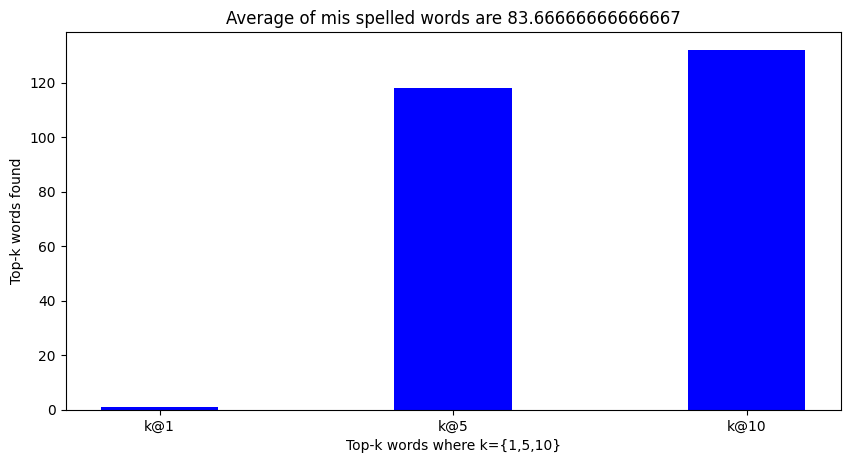

In [83]:

TELEMARK_PATH = '/content/drive/MyDrive/ABODAT.643'

# syn_arr = wordnet.synsets('beautiful')
# syn_arr = wordnet.synsets('through')
# syn_arr = wordnet.synsets('completely')
syn_arr = wordnet.synsets('hurry')

syn_arr[0].definition()
tokens = syn_arr[1].lemma_names()

print("Input wors of 'hurry' with lexical names are")
print(tokens)
print()

# text the misspells of words in pair from Birkbeck dataset
def test_misspells(k):
        total = 0
        identif = 0
        pairs = []
        with open(TELEMARK_PATH, mode='r', encoding='utf8') as in_f:
            for line in in_f:
                misspell, correct = line.strip().split(" ")[:2]
                if len(correct) > 1:
                  candidates = check(misspell, k)
                  if len(candidates) > 0:
                    # print(candidates)
                    # pairs.append([misspell, correct])
                    pairs.append(candidates)
                  total += 1
                 
                  # if correct in candidates:
                  #       identif += 1             
                  #       #  mis spelled
                  #       pairs.append([misspell, correct])
                  # else:
                        # correct
                        # print(total, ": no correct spelling identified for misspelling ",
                        #       misspell, ". The correct spelling was ", correct, ".")
        # print("Identified %d correct spells out of %d." % (identif, total))
        return pairs

def min_edit_distance(source, target, k):
  
        dist = 0
        n = len(source)
        m = len(target)
        # create a distance matrix distance[n+1, m+1], temporarily silled in with 'None'
        distance = []
        for i in range(n+1):
            distance.append([])
            for j in range(m+1):
                distance[i].append(0)

        # initialization: the zeroth row and col is the distance from the empty string
        distance[0][0] = 0

        # initiallize first col
        for i in range(1, n+1):
            distance[i][0] = distance[i-1][0] + 1
        # initialize first row
        for j in range(1, m+1):
            distance[0][j] = distance[0][j-1] + 1

        # recurrence relation
        for i in range(1, n+1):
            for j in range(1, m+1):
                # cell to the left in table plus one(cost)
                left = distance[i-1][j] + 1
                # cell above in table plus one(cost)
                up = distance[i][j-1] + 1
                # diagnoal value plus cost for substitution
                diagonal = distance[i-1][j-1]
                if source[i-1] != target[j-1]:
                    diagonal += 1
                    # fill in the cell
                distance[i][j] = min(left, up, diagonal)

        dist = distance[n][m]
        if dist == k:
        #  print("[" + source + ", "+ target + "]")
         return [source, target]
        else:
         return 0


def check(word, k):
  spellings = [] 
  for item in tokens:
        dist = min_edit_distance(word, item, k)
        if dist != 0:
         spellings.append(dist)

  return spellings

x = test_misspells(1)
print("For K=1 s@1 mis spells found " , len(x))
print(x)

x1 = test_misspells(5)
print("\nFor K=5 s@5 mis spells found " , len(x1))
print(x1)

x2 = test_misspells(10)
print("\nFor K=10 s@10 mis spells found " , len(x2))
print(x2)


words = ["k@1", "k@5", "k@10"]
avg = [len(x), len(x1), len(x2)]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words, avg, color ='blue',
        width = 0.4)

avg_words = (len(x) + len(x1) + len(x2))/3

print("\n Average of mis spelled words are ", avg_words, "\n")
 
plt.xlabel("Top-k words where k={1,5,10}")
plt.ylabel("Top-k words found")
plt.title("Average of mis spelled words are 83.66666666666667")
plt.show()


